In [79]:
'''
Run the following commands on your terminal to install respective packages to your computer in order to execute this project
pip install matplotlib
pip install pandas
pip install numpy
pip install seaborn
pip install sklearn
pip install graphviz
pip install xgboost
'''

'\nRun the following commands on your terminal to install respective packages to your computer in order to execute this project\npip install matplotlib\npip install pandas\npip install numpy\npip install seaborn\npip install sklearn\npip install graphviz\npip install xgboost\n'

In [39]:
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import itertools
import datetime

import warnings
#Never display python warnings
warnings.filterwarnings('ignore')

#Load Machine Learning Lib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score



In [40]:
# Problem Formulation - What are we trying to solve?
# We want to predict if a customer will churn or not

Reading / Loading the Raw Data into Python From CSV

In [41]:
# Loading the data
raw_data = pd.read_csv('C:\\Users\\Blue\\Documents\\Python-Projects\\Decision Tree Project\\churn raw data.csv', encoding='latin-1')

# print the shape (number of rows and columns respectively)
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data Pre-Processing Phase

In [80]:
# Find unique elements contained in each feature of the dataset

In [42]:
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    num_values = len(unique_vals)
    if num_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, num_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, num_values))

The number of values for feature RowNumber :10000
The number of values for feature CustomerId :10000
The number of values for feature Surname :2932
The number of values for feature CreditScore :460
The number of values for feature Geography :3 -- ['France' 'Germany' 'Spain']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Age :70
The number of values for feature Tenure :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Balance :6382
The number of values for feature NumOfProducts :4 -- [1 2 3 4]
The number of values for feature HasCrCard :2 -- [0 1]
The number of values for feature IsActiveMember :2 -- [0 1]
The number of values for feature EstimatedSalary :9999
The number of values for feature Exited :2 -- [0 1]


In [43]:
# Checking for null values
raw_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [44]:
raw_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

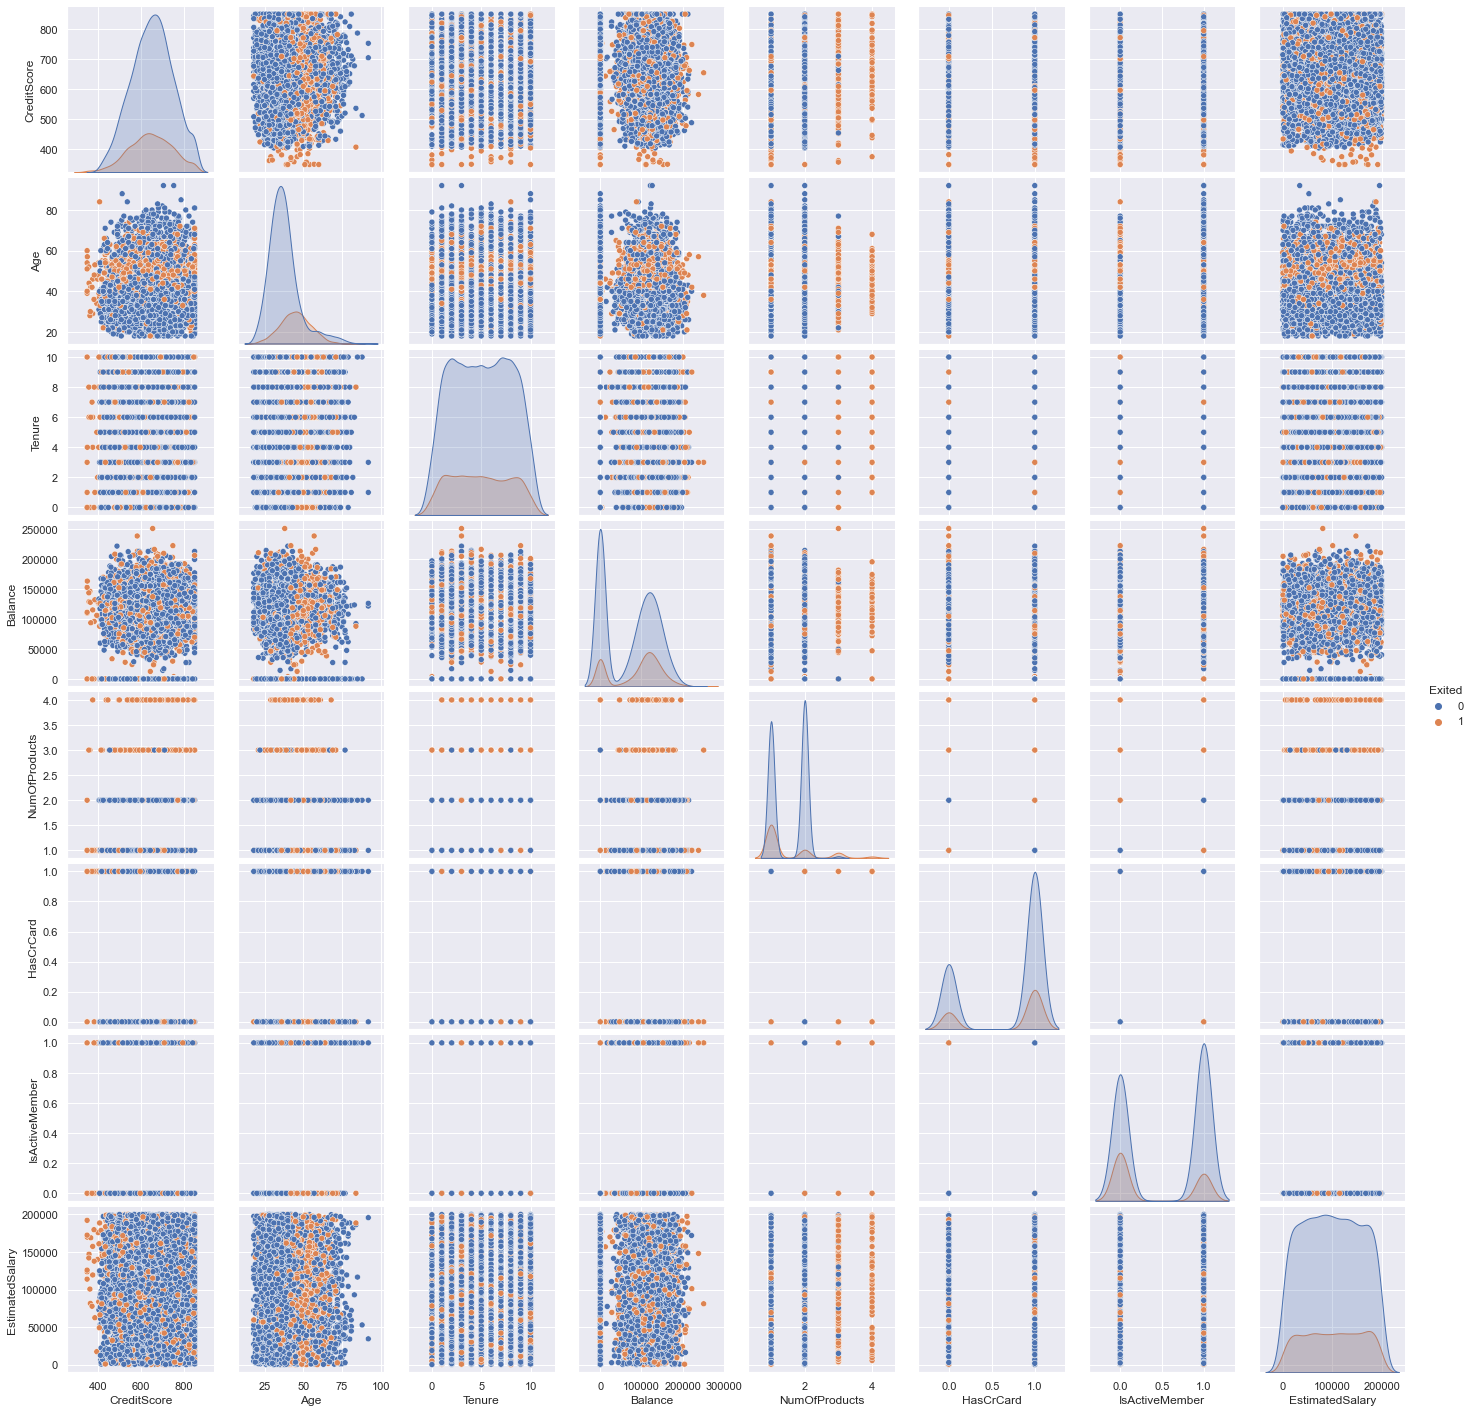

In [45]:
# Limiting the dataframe to only include usable columns
raw_data2 = raw_data[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

# Visualize the data using seaborn Pairplots
g = sns.pairplot(raw_data2, hue = 'Exited', diag_kws={'bw': 0.2})

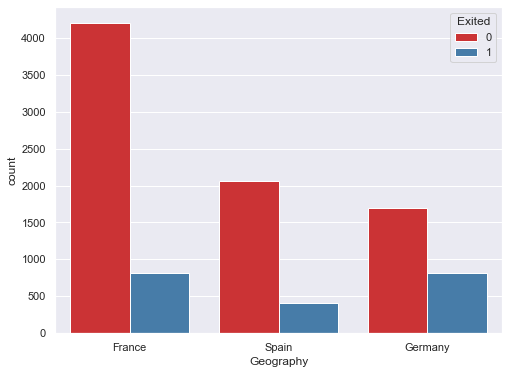

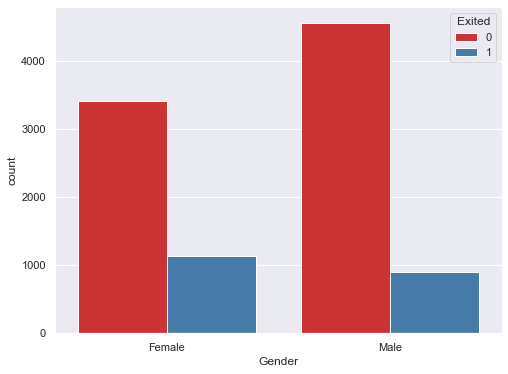

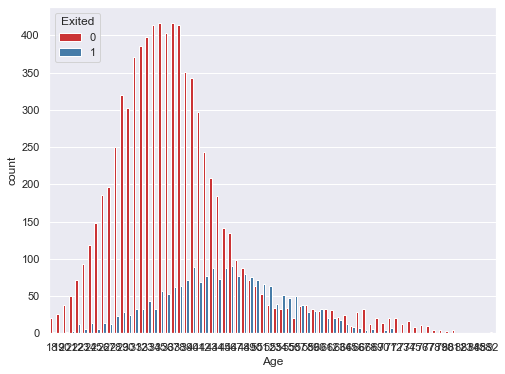

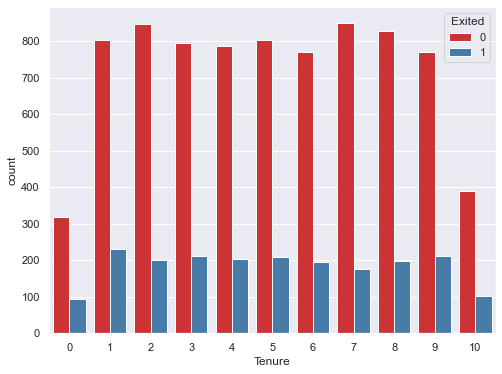

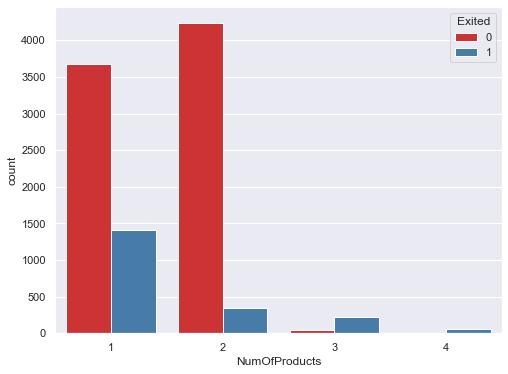

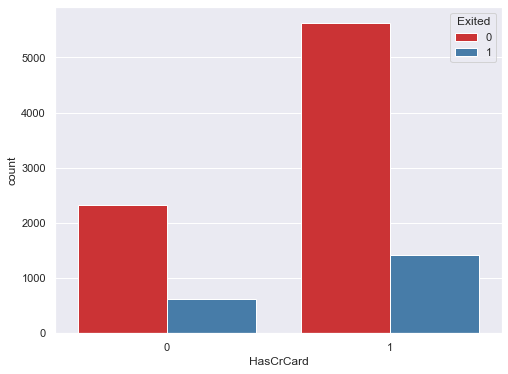

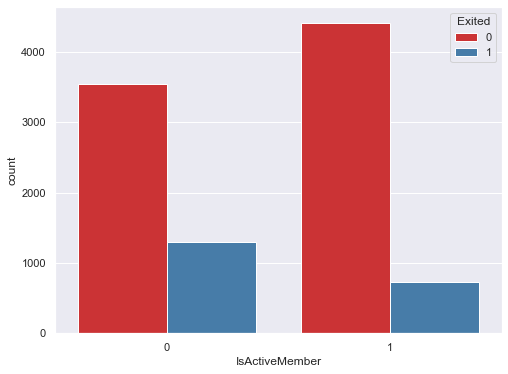

In [46]:
# Investigate all the features by our y

features = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember']


for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=raw_data2, hue ='Exited', palette="Set1")

In [47]:
raw_data2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data2, columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])
new_raw_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1


In [49]:
# Scaling our columns
# This takes the selected variables, reads their minimum and maximum values, scales them as 0 and 1,
# and fits all the other values into this range

scale_vars = ['CreditScore','EstimatedSalary','Balance','Age']
scaler = MinMaxScaler()
new_raw_data[scale_vars] = scaler.fit_transform(new_raw_data[scale_vars])
new_raw_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.324324,2,0.000000,1,0.506735,1,1,0,0,1,0,0,1,0,1
1,0.516,0.310811,1,0.334031,1,0.562709,0,0,0,1,1,0,1,0,0,1
2,0.304,0.324324,8,0.636357,3,0.569654,1,1,0,0,1,0,0,1,1,0
3,0.698,0.283784,1,0.000000,2,0.469120,0,1,0,0,1,0,1,0,1,0
4,1.000,0.337838,2,0.500246,1,0.395400,0,0,0,1,1,0,0,1,0,1


### Splitting the Raw Data - into training and testing data sets

In [50]:
# our independent(x) variables will be the new raw data with the 'Exited' column removed
# our dependent(y) variable will only include the 'Exited' column which represents the churns

X = new_raw_data.drop('Exited', axis=1).values# Input features (attributes)
y = new_raw_data['Exited'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

# split our dataset into train and test data
# in this case, we used 90% of the data for training our model, and 10% of the data to test the model

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

X shape: (10000, 15)
y shape: (10000,)


### Running Decision Tree Classifier

In [81]:
'''
 - Decision Trees are a supervised learning method used for classification and regression
    How it works:
- The ID3 algorithm begins with the original set {S} S as the root node
- On each iteration of the algorithm, it iterates through every unused attribute of the set and calculates the entropy (or information gain) of that attribute
- It then selects the attribute which has the smallest entropy (or largest information gain) value. 
- The set is then split by the selected attribute to produce subsets of the data. 
- The algorithm continues to recurse on each subset, considering only attributes never selected before.'''

'\n - Decision Trees are a supervised learning method used for classification and regression\n    How it works:\n- The ID3 algorithm begins with the original set {S} S as the root node\n- On each iteration of the algorithm, it iterates through every unused attribute of the set and calculates the entropy (or information gain) of that attribute\n- It then selects the attribute which has the smallest entropy (or largest information gain) value. \n- The set is then split by the selected attribute to produce subsets of the data. \n- The algorithm continues to recurse on each subset, considering only attributes never selected before.'

In [52]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=2, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

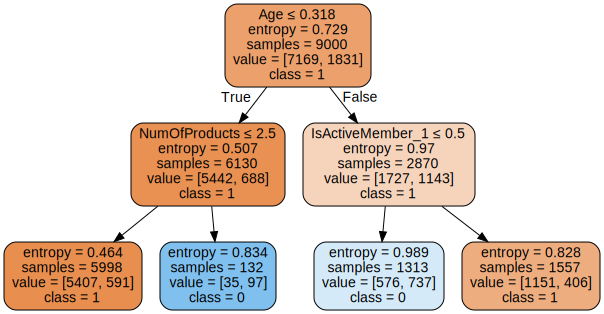

In [53]:
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'
import graphviz

dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=new_raw_data.drop('Exited', axis=1).columns,    
    class_names=new_raw_data['Exited'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

CALCULATE FEATURE IMPORTANCE OF OUR COLUMNS

In [54]:
for i, column in enumerate(new_raw_data.drop('Exited', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature CreditScore:, 0.000
Importance of feature Age:, 0.622
Importance of feature Tenure:, 0.000
Importance of feature Balance:, 0.000
Importance of feature NumOfProducts:, 0.196
Importance of feature EstimatedSalary:, 0.000
Importance of feature Geography_France:, 0.000
Importance of feature Geography_Germany:, 0.000
Importance of feature Geography_Spain:, 0.000
Importance of feature Gender_Female:, 0.000
Importance of feature Gender_Male:, 0.000
Importance of feature HasCrCard_0:, 0.000
Importance of feature HasCrCard_1:, 0.000
Importance of feature IsActiveMember_0:, 0.000
Importance of feature IsActiveMember_1:, 0.182


,level_0,index,Variable,Feature Importance Score
0,0,1.0,Age,0.622346
1,16,NaN,Age,0.622346
2,1,4.0,NumOfProducts,0.195552
3,19,NaN,NumOfProducts,0.195552
4,29,NaN,IsActiveMember_1,0.182102
5,2,14.0,IsActiveMember_1,0.182102
6,5,3.0,Balance,0.000000
7,18,NaN,Balance,0.000000
8,28,NaN,IsActiveMember_0,0.000000
9,27,NaN,HasCrCard_1,0.000000


In [55]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Test
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.8213333333333334
Testing Accuracy is:  0.822


### confusion matrix

In [56]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

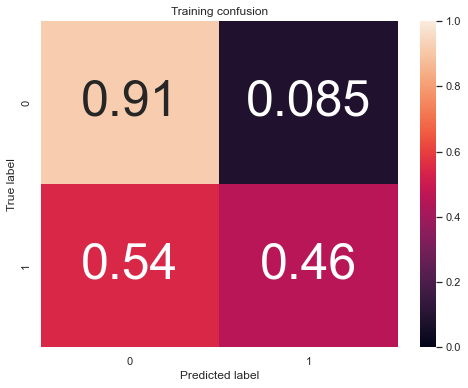

In [57]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

In [58]:
y_pred = dt.predict(X_train)
y_pred
confusion_matrix(y_train, y_pred)

array([[6558,  611],
       [ 997,  834]], dtype=int64)

In [59]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)

The True Positive rate / Recall per class is:  [0.914772 0.455489]
The Precision per class is:  [0.868034 0.577163]
The False Alarm rate per class is:  [0.544511 0.085228]
The Miss Rate per class is:  [0.085228 0.544511]
The Classification error of each class is [0.178667 0.178667]
The Accuracy of each class is [0.821333 0.821333]

The average Recall is:  0.685130369325603
The average Precision is:  0.7225985220264771
The average False Alarm is:  0.31486963067439694
The average Miss Rate rate is:  0.31486963067439694
The average Classification error is 0.17866666666666667
The average Accuracy is 0.8213333333333334


### Random Forests

- Random forest is an ensemble classifier that consists of many decision trees and outputs the class that is the mode of the class's output by individual trees.
- Takes the average (entropy/information gain) of many Decision Trees via bagging. 
- Bagging is short for “bootstrap aggregation,” meaning that samples are chosen with replacement (bootstrapping), and combined (aggregated) by taking their average

In [60]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

Training Accuracy is:  1.0
Testing Accuracy is:  0.861


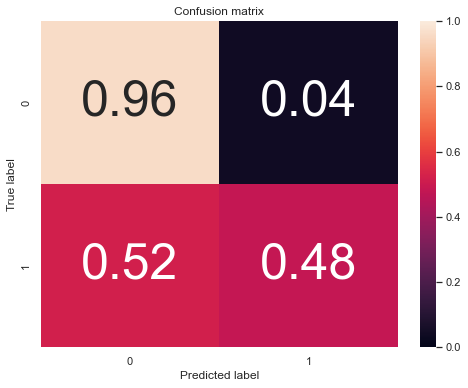

In [61]:
# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.860
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.794
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.794
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.797
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.802
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.868
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.800
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.812
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.831
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.850
Classification accuracy on test set with max features = log2 and max_depth = None: 0.868
Classification accuracy on test set with max features = log2

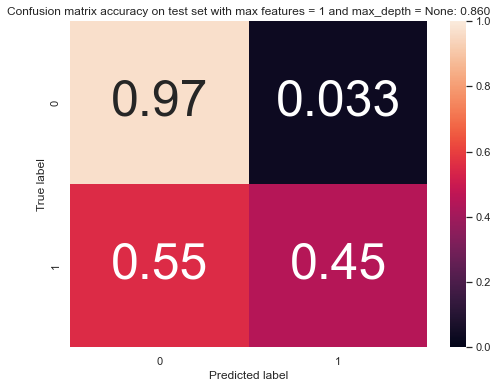

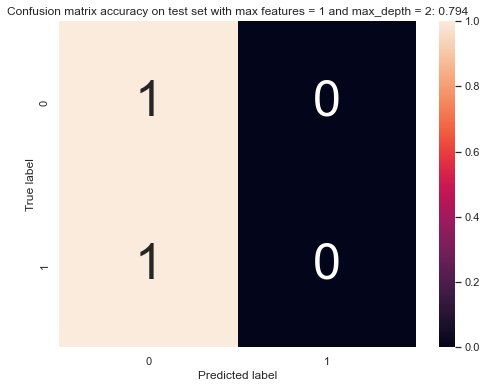

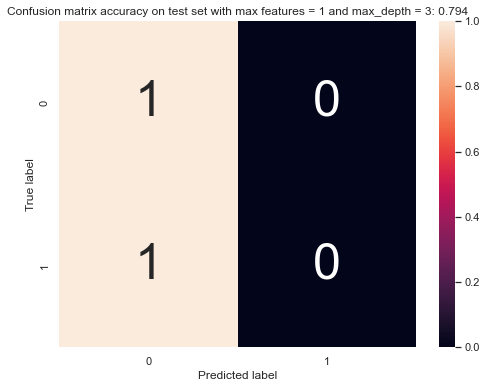

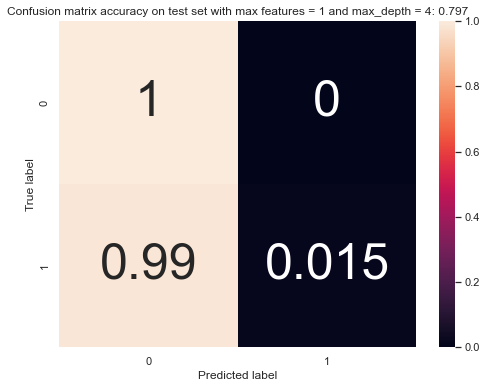

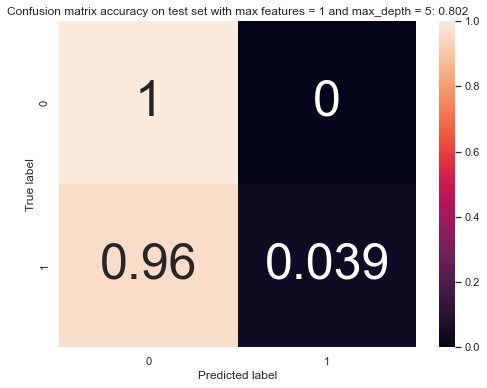

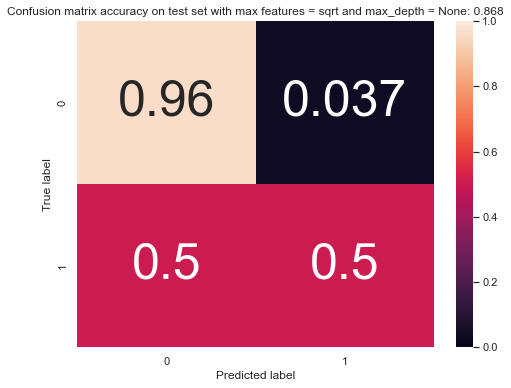

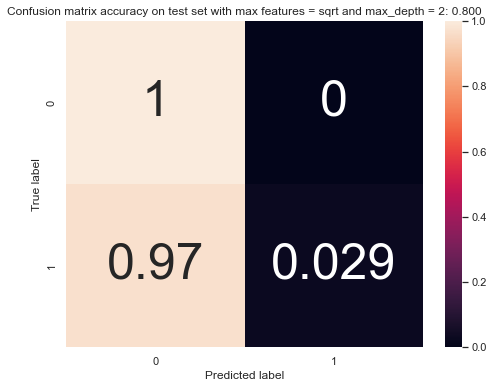

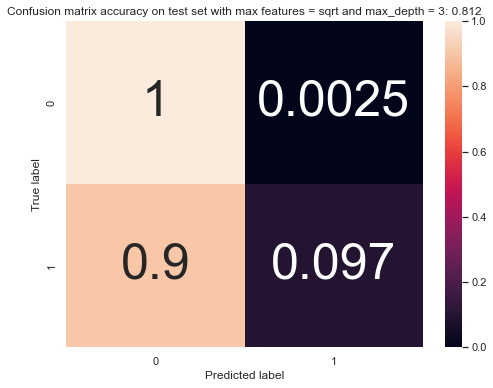

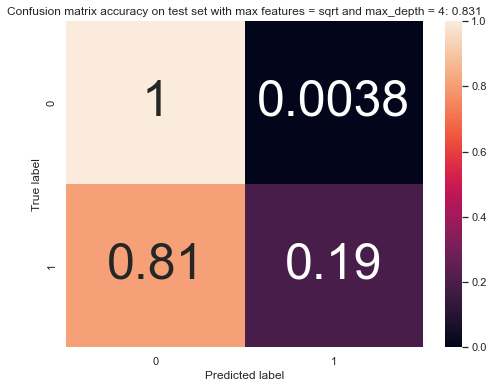

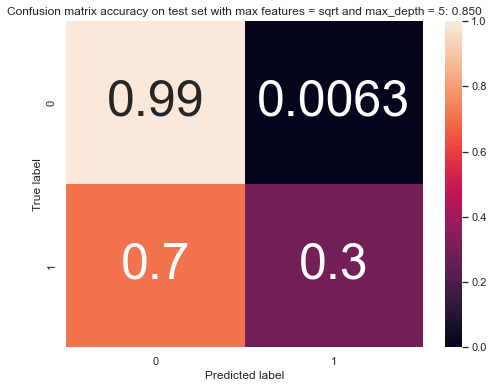

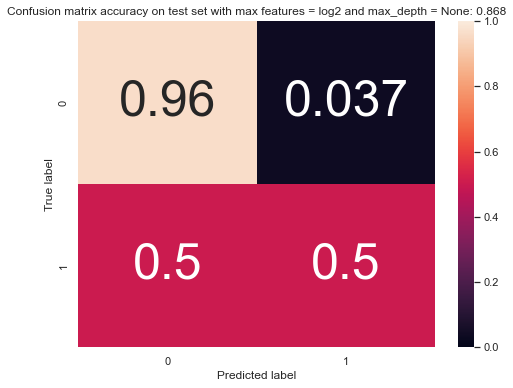

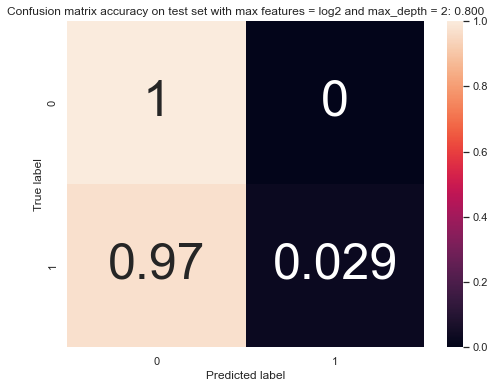

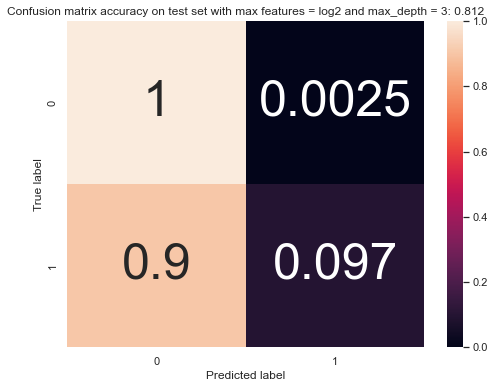

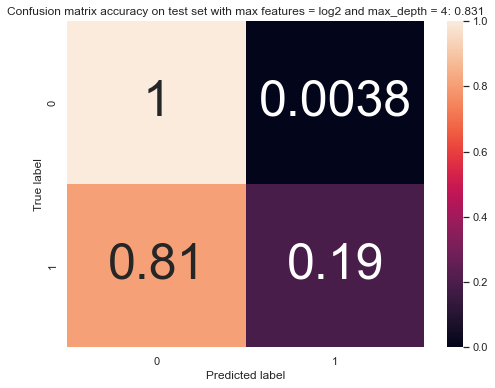

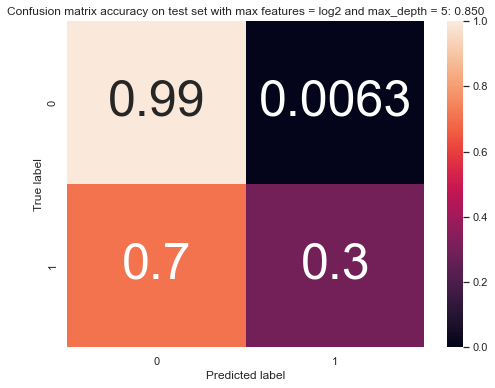

In [62]:
# Tunning Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

### XGBoost

- XGBoost is short for “eXtreme Gradient Boosting.”
- It is an ensemble model; ensemble models combines different machine learning models into one
- Instead of aggregating predictions, boosters turn weak learners into strong learners by focusing on where the individual models went wrong
- XGBoost trains upon the residuals. Instead of aggregating trees, gradient boosted trees learns from errors during each boosting round

In [63]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier(tree_method='auto')

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# fitting it
clf.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.831 total time=   1.0s
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.832 total time=   0.7s
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.828 total time=   0.5s
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.837 total time=   0.5s
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.826 total time=   0.5s
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=2, min_child_weight=7;, score=0.866 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.25, max_depth=2, min_child_weight=7;, score=0.863 total time=   0.1s
[CV 3/5] END colsa

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [2, 3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [64]:
# best parameters
clf.best_params_


{'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.3,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [65]:
# getting the model with the best parameters
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

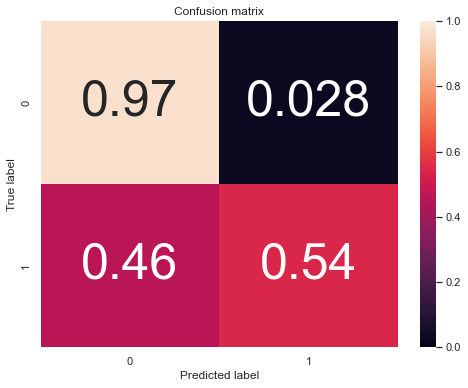

In [66]:
# fiting the model with the best parameters

final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=5,  monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='auto', validate_parameters=1, verbosity=None)

# fitting it
final_model.fit(X,y)

pred_xgboost = final_model.predict(X)

# Confusion Matrix
cm = confusion_matrix(y, pred_xgboost)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Deploying our model on NEW, unseen data

In [67]:
# Loading from CSV
unseen_data = pd.read_csv('C:\\Users\\Blue\\Documents\\Python-Projects\\Decision Tree Project\\new unseen data.csv', encoding='latin-1')

Applying the same pre-processing stages


In [68]:
# 9.2. Applying the same pre-processing stages

unseen_data2 = unseen_data[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

# dummy variables
unseen_data2 = pd.get_dummies(unseen_data2, columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])

#scaling
scale_vars = ['CreditScore','EstimatedSalary','Balance','Age']

unseen_data2[scale_vars] = scaler.fit_transform(unseen_data2[scale_vars])

unseen_data2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.342857,2,0.000000,1,0.507077,1,0,0,1,0,0,1,0,1
1,0.516,0.328571,1,0.334031,1,0.563089,0,0,1,1,0,1,0,0,1
2,0.304,0.342857,8,0.636357,3,0.570039,1,0,0,1,0,0,1,1,0
3,0.698,0.300000,1,0.000000,2,0.469437,1,0,0,1,0,1,0,1,0
4,1.000,0.357143,2,0.500246,1,0.395667,0,0,1,1,0,0,1,0,1


In [69]:
final_model.predict(unseen_data2.values)

array([0, 0, 1, ..., 0, 0, 0])

Making predictions

In [70]:
pred_xgboost = final_model.predict(unseen_data2.values)
pred_prob_xgboost = final_model.predict_proba(unseen_data2.values)

pred_xgboost

array([0, 0, 1, ..., 0, 0, 0])

In [71]:
# probabilities
pred_prob_xgboost

array([[0.570323, 0.429677],
       [0.800927, 0.199073],
       [0.034366, 0.965634],
       ...,
       [0.878443, 0.121557],
       [0.777376, 0.222624],
       [0.891002, 0.108998]], dtype=float32)

In [72]:
# function to select second column for probabilities
def column(matrix, i):
    return [row[i] for row in matrix]

column(pred_prob_xgboost, 1)

[0.42967677,
 0.19907328,
 0.9656339,
 0.0674136,
 0.11659431,
 0.2536743,
 0.031401545,
 0.9865002,
 0.061604246,
 0.0329442,
 0.019681081,
 0.011856573,
 0.08372716,
 0.02364389,
 0.03453477,
 0.2457874,
 0.9803601,
 0.03700292,
 0.66393733,
 0.01887094,
 0.035635307,
 0.039212976,
 0.43816993,
 0.055192746,
 0.34175897,
 0.0047184476,
 0.20834823,
 0.05896785,
 0.42458022,
 0.079089865,
 0.8695821,
 0.07029891,
 0.24168718,
 0.053525157,
 0.025787499,
 0.6237808,
 0.021346767,
 0.022598494,
 0.17544435,
 0.04978202,
 0.29157832,
 0.7685509,
 0.29196253,
 0.7277349,
 0.17334686,
 0.08478209,
 0.2513047,
 0.46561462,
 0.22099291,
 0.09136934,
 0.13424866,
 0.06027392,
 0.03500613,
 0.49659535,
 0.66007394,
 0.12931211,
 0.37727278,
 0.08115397,
 0.775741,
 0.50156736,
 0.29543543,
 0.08525938,
 0.08128405,
 0.10544624,
 0.12045553,
 0.030397177,
 0.32254443,
 0.07641896,
 0.044440806,
 0.073676355,
 0.9990552,
 0.15460844,
 0.10156085,
 0.033321984,
 0.0132470345,
 0.07812271,
 0.0570

In [73]:
#Joining the raw data with the predictions

output = unseen_data.copy()
output['Predictions - Churn or Not'] = pred_xgboost
output['Predictions - Probability to Churn'] = column(pred_prob_xgboost, 1)
output['Predictions - Churn or Not Desc'] = 'Empty'
output['Predictions - Churn or Not Desc'][output['Predictions - Churn or Not'] == 0] = 'Retention'
output['Predictions - Churn or Not Desc'][output['Predictions - Churn or Not'] == 1] = 'Churn'
output.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predictions - Churn or Not,Predictions - Probability to Churn,Predictions - Churn or Not Desc
0,1,15634638,AP Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0.429677,Retention
1,2,15647347,AP Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0.199073,Retention
2,3,15619340,AP Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0.965634,Churn
3,4,15701390,AP Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0.067414,Retention
4,5,15737924,AP Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0.116594,Retention


In [74]:
#Exporting the data in a CSV
output.to_csv('Churn Predictions Output.csv', index=False)

os. getcwd() 

'c:\\Users\\Blue\\Documents\\Python-Projects\\Decision Tree Project'